## 35-A-2 적합한 데이터 전처리 방법 찾기

In [8]:
import pandas as pd
from sklearn import preprocessing, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=datasets.load_boston()
dfx = pd.DataFrame(data.data, columns=data.feature_names)
dfx = dfx.drop(['CHAS','RAD'], axis=1) #범주형이라 제거
dfy =pd.DataFrame(data.target, columns=['MMEDV'])
regr = LinearRegression()

n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
avg/n

0.693812463303725

#### 전처리 전 linear regression model의 score : 0.693812
- 이 score를 높이기 위한 데이타 전처리 방법 찾기

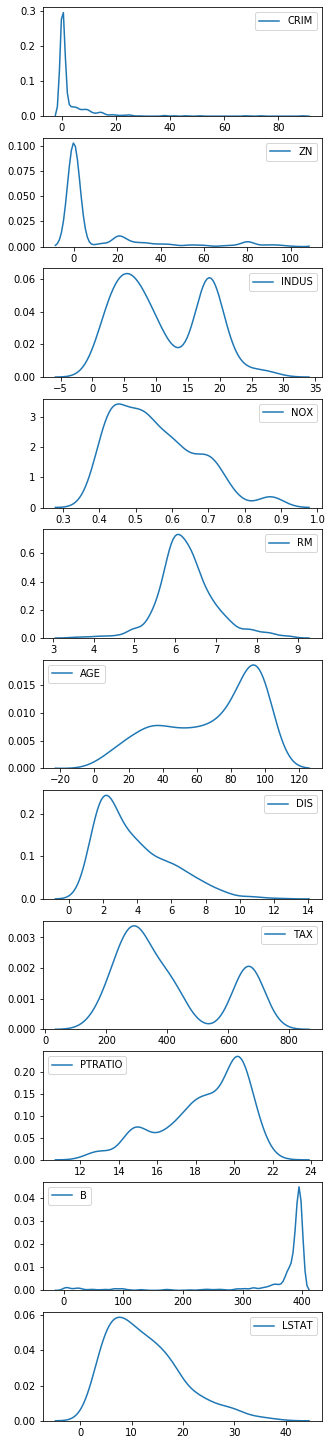

In [10]:
# step1. 모든 컬럼 data들의 분포확인 <data 특징확인 코드>
_, axes = plt.subplots(11, 1, figsize=(5,26))

for i, ax in enumerate(axes):
    sns.kdeplot(dfx.iloc[:,i], ax=ax)
plt.show()

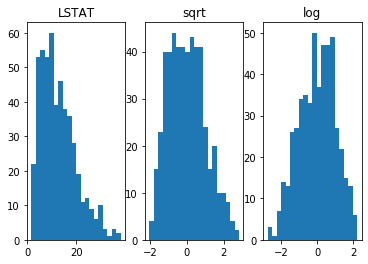

In [7]:
#step2. 특정 컬럼(예.'LSTAT')의 정규분포화 구현 (선형 모델은 변수가 정규분포와 유사할수록 성능향상)
plt.figure(1)
plt.subplot(131)
plt.hist(dfx['LSTAT'], bins=20)
plt.title('LSTAT')


plt.subplot(132)
dfx['sqrt']= preprocessing.scale(np.sqrt(dfx['LSTAT']+1))
plt.title('sqrt')
plt.hist(dfx['sqrt'], bins=20)

plt.subplot(133)
dfx['log']= preprocessing.scale(np.log(dfx['LSTAT']+1))
plt.title('log')
plt.hist(dfx['log'], bins=20)


plt.show()

- 'LSTAT' data의 경우 log함수 적용시 정규분포에 근사..(전처리 작업)

In [13]:
#특정변수에만 함수 적용하여 정규분포화 하기
dfx['LSTAT_log']= preprocessing.scale(np.log(dfx['LSTAT']+1))wjs

#데이타 프레임 전체에 함수적용
dfx_log = dfx.apply(lambda x: x*x)

n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
avg/n

0.7642712653383701

In [ ]:
#### 전처리 후 linear regression model의 score : 0.7642712
- 이 score를 높이기 위한 데이타 전처리 방법 찾기